In [1]:
# Loading essential libraries
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("kaggle_fake_train.csv")

In [3]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
df.shape

(20800, 5)

# Data Preprocessing

In [5]:
df.drop(columns=['id'],inplace=True)

In [6]:
df.head()

,title,author,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [7]:
df.isna().sum()

title      558
author    1957
text        39
label        0
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.shape

(18285, 4)

In [10]:
df['text'][1]

'Ever get the feeling your life circles the roundabout rather than heads in a straight line toward the intended destination? [Hillary Clinton remains the big woman on campus in leafy, liberal Wellesley, Massachusetts. Everywhere else votes her most likely to don her inauguration dress for the remainder of her days the way Miss Havisham forever wore that wedding dress.  Speaking of Great Expectations, Hillary Rodham overflowed with them 48 years ago when she first addressed a Wellesley graduating class. The president of the college informed those gathered in 1969 that the students needed “no debate so far as I could ascertain as to who their spokesman was to be” (kind of the like the Democratic primaries in 2016 minus the   terms unknown then even at a Seven Sisters school). “I am very glad that Miss Adams made it clear that what I am speaking for today is all of us —  the 400 of us,” Miss Rodham told her classmates. After appointing herself Edger Bergen to the Charlie McCarthys and Mor

In [11]:
df['title'][1]

'FLYNN: Hillary Clinton, Big Woman on Campus - Breitbart'

In [12]:
df.drop(columns = ['author'],inplace=True)

In [13]:
df.head()

,title,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Ever get the feeling your life circles the rou...,0
2,Why the Truth Might Get You Fired,"Why the Truth Might Get You Fired October 29, ...",1
3,15 Civilians Killed In Single US Airstrike Hav...,Videos 15 Civilians Killed In Single US Airstr...,1
4,Iranian woman jailed for fictional unpublished...,Print \nAn Iranian woman has been sentenced to...,1


In [14]:
df['final_text'] = df['title']+df['text']

In [15]:
df.drop(columns = ['title','text'],inplace=True)

In [16]:
df.head()

,label,final_text
0,1,House Dem Aide: We Didn’t Even See Comey’s Let...
1,0,"FLYNN: Hillary Clinton, Big Woman on Campus - ..."
2,1,Why the Truth Might Get You FiredWhy the Truth...
3,1,15 Civilians Killed In Single US Airstrike Hav...
4,1,Iranian woman jailed for fictional unpublished...


In [17]:

# Importing essential libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0, 0.5, 'Count')

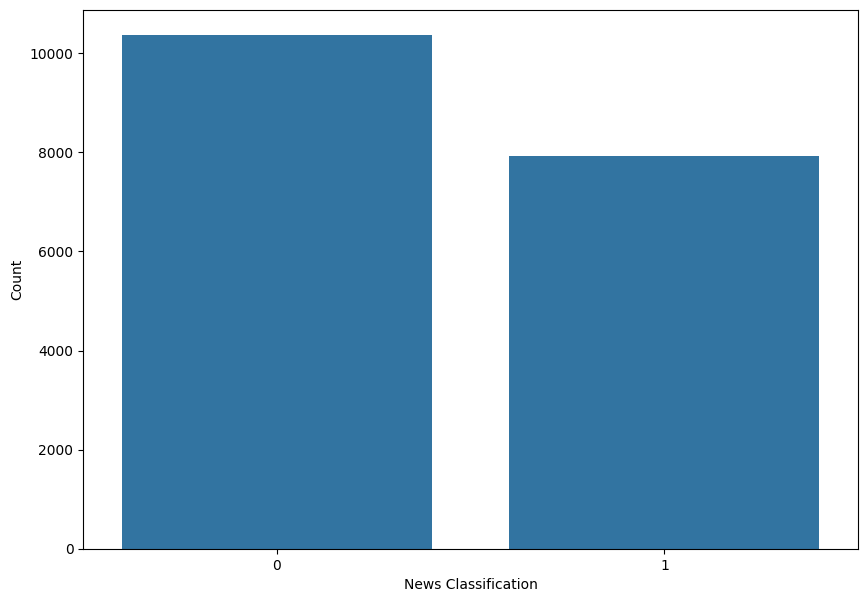

In [18]:

plt.figure(figsize=(10,7))
sns.countplot(x='label', data=df)
plt.xlabel('News Classification')
plt.ylabel('Count')


# Data cleaning

In [19]:

# Importing essential libraries for performing Natural Language Processing on 'kaggle_fake_train' dataset
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# # Cleaning the news
# corpus = []
# ps = PorterStemmer()
# lemmatizer = WordNetLemmatizer()

# for i in range(0,news.shape[0]):

#   # Cleaning special character from the news-title
#   title = re.sub(pattern='[^a-zA-Z]', repl=' ', string=df.final_text[i])

#   # Converting the entire news-title to lower case
#   title = title.lower()

#   # Tokenizing the news-title by words
#   words = title.split()

#   # Removing the stopwords
#   words = [word for word in words if word not in set(stopwords.words('english'))]

#   # Stemming the words
#   words = [lemmatizer.lemmatize(word) for word in words]

#   # Joining the stemmed words
#   title = ' '.join(words)

#   # Building a corpus of news-title
#   corpus.append(title)

In [20]:

df['final_text'] = df['final_text'].apply(lambda x : re.sub(r'[^a-zA-Z\s]',' ',str(x)))
df['final_text'] = df['final_text'].apply(lambda x : x.lower())

In [21]:
def remove_stopwords(text):
  stop_words = set(stopwords.words('english'))
  words = nltk.word_tokenize(text)
  filtered = [word for word in words if word.lower() not in stop_words]
  return ' '.join(filtered)


In [22]:
ps = PorterStemmer()
def porterstemmer_func(text):
  words = nltk.word_tokenize(text)
  stemmed = [ps.stem(word) for word in words]
  return ' '.join(stemmed)


In [23]:

def lemmatize_text(text):
  lemmatizer = WordNetLemmatizer()
  words = nltk.word_tokenize(text)
  lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
  return ' '.join(lemmatized_words)


In [24]:


df['final_text'] = df['final_text'].apply(remove_stopwords)
df['final_text'] = df['final_text'].apply(lemmatize_text)

In [25]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000, ngram_range=(1,3))
X = cv.fit_transform(df['final_text']).toarray()


In [37]:
y = df.iloc[:,0]

In [38]:
y

0        1
1        0
2        1
3        1
4        1
        ..
20795    0
20796    0
20797    0
20798    1
20799    1
Name: label, Length: 18285, dtype: int64

In [39]:
df['final_text'][0]

'house dem aide even see comey letter jason chaffetz tweeted ithouse dem aide even see comey letter jason chaffetz tweeted darrell lucus october subscribe jason chaffetz stump american fork utah image courtesy michael jolley available creative common license apology keith olbermann doubt worst person world week fbi director james comey according house democratic aide look like also know second worst person well turn comey sent infamous letter announcing fbi looking email may related hillary clinton email server ranking democrat relevant committee hear comey found via tweet one republican committee chairman know comey notified republican chairman democratic ranking member house intelligence judiciary oversight committee agency reviewing email recently discovered order see contained classified information long letter went oversight committee chairman jason chaffetz set political world ablaze tweet fbi dir informed fbi learned existence email appear pertinent investigation case reopened j

# Train test split

In [40]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)


In [41]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 2, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

# Naive Bayes Classifier

In [42]:

# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)


MultinomialNB()

Model **Building**

In [43]:
nb_y_pred = nb_classifier.predict(X_test)


In [44]:

# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score, precision_score, recall_score
score1 = accuracy_score(y_test, nb_y_pred)
score2 = precision_score(y_test, nb_y_pred)
score3 = recall_score(y_test, nb_y_pred)
print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}".format(round(score2,2)))
print("Recall score is: {}".format(round(score3,2)))

---- Scores ----
Accuracy score is: 89.83%
Precision score is: 0.9
Recall score is: 0.87


In [45]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
nb_cm = confusion_matrix(y_test, nb_y_pred)

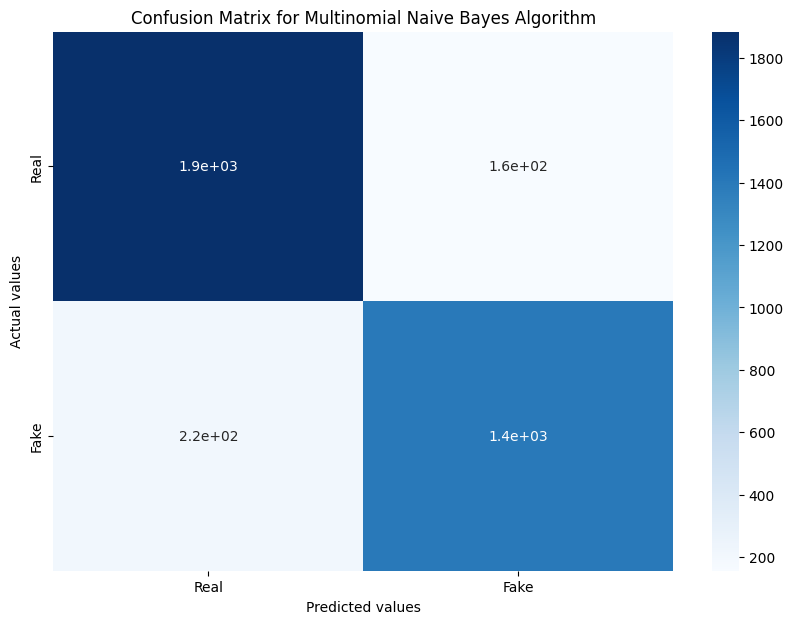

In [46]:
# Plotting the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(data=nb_cm, annot=True, cmap="Blues", xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Multinomial Naive Bayes Algorithm')
plt.show()

In [47]:

# Hyperparameter tuning the Naive Bayes Classifier
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.1,1.1,0.1):
  temp_classifier = MultinomialNB(alpha=i)
  temp_classifier.fit(X_train, y_train)
  temp_y_pred = temp_classifier.predict(X_test)
  score = accuracy_score(y_test, temp_y_pred)
  print("Accuracy score for alpha={} is: {}%".format(round(i,1), round(score*100,2)))
  if score>best_accuracy:
    best_accuracy = score
    alpha_val = i
print('--------------------------------------------')
print('The best accuracy is {}% with alpha value as {}'.format(round(best_accuracy*100, 2), round(alpha_val,1)))

Accuracy score for alpha=0.1 is: 89.86%
Accuracy score for alpha=0.2 is: 89.86%
Accuracy score for alpha=0.3 is: 89.86%
Accuracy score for alpha=0.4 is: 89.88%
Accuracy score for alpha=0.5 is: 89.88%
Accuracy score for alpha=0.6 is: 89.86%
Accuracy score for alpha=0.7 is: 89.86%
Accuracy score for alpha=0.8 is: 89.86%
Accuracy score for alpha=0.9 is: 89.83%
Accuracy score for alpha=1.0 is: 89.83%
--------------------------------------------
The best accuracy is 89.88% with alpha value as 0.4


# Logistic Regression

In [48]:

from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression(random_state=0)
lr_classifier.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [49]:
# Predicting the Test set results
lr_y_pred = lr_classifier.predict(X_test)

In [50]:
# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score, precision_score, recall_score
score1 = accuracy_score(y_test, lr_y_pred)
score2 = precision_score(y_test, lr_y_pred)
score3 = recall_score(y_test, lr_y_pred)
print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}".format(round(score2,2)))
print("Recall score is: {}".format(round(score3,2)))

---- Scores ----
Accuracy score is: 94.91%
Precision score is: 0.94
Recall score is: 0.94


In [51]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
lr_cm = confusion_matrix(y_test, lr_y_pred)


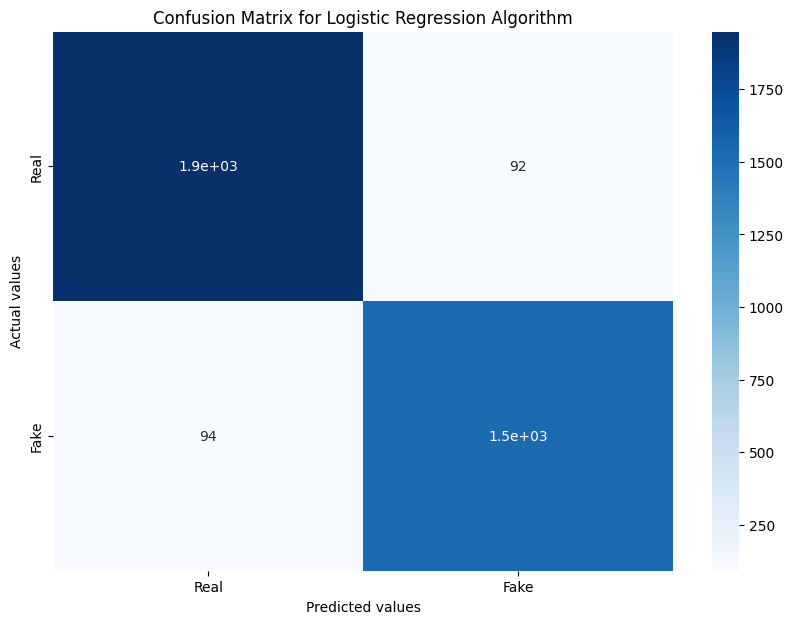

In [52]:
# Plotting the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(data=lr_cm, annot=True, cmap="Blues", xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Logistic Regression Algorithm')
plt.show()

In [53]:
best_accuracy = 0.0
c_val = 0.0
for i in np.arange(0.1,1.1,0.1):
  temp_classifier = LogisticRegression(C=i, random_state=0)
  temp_classifier.fit(X_train, y_train)
  temp_y_pred = temp_classifier.predict(X_test)
  score = accuracy_score(y_test, temp_y_pred)
  print("Accuracy score for C={} is: {}%".format(round(i,1), round(score*100,2)))
  if score>best_accuracy:
    best_accuracy = score
    c_val = i
print('--------------------------------------------')
print('The best accuracy is {}% with C value as {}'.format(round(best_accuracy*100, 2), round(c_val,1)))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy score for C=0.1 is: 95.05%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy score for C=0.2 is: 94.97%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy score for C=0.3 is: 94.97%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy score for C=0.4 is: 95.02%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy score for C=0.5 is: 95.05%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy score for C=0.6 is: 95.05%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy score for C=0.7 is: 95.0%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy score for C=0.8 is: 94.97%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy score for C=0.9 is: 94.91%
Accuracy score for C=1.0 is: 94.91%
--------------------------------------------
The best accuracy is 95.05% with C value as 0.1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# **Random forest with Grid searchCV**

In [39]:
# from sklearn.ensemble import RandomForestClassifier

# from sklearn.model_selection import GridSearchCV

# from sklearn import metrics
# rfc = RandomForestClassifier()
# forest_params = [{'max_depth': list(range(10, 15)), 'max_features': list(range(200,225))}]

# clf = GridSearchCV(rfc, forest_params, cv = 10, scoring='accuracy')

# clf.fit(X_train, y_train)

KeyboardInterrupt: 

In [54]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=250,random_state=45).fit(X_train, y_train)

In [55]:
rf_y_pred = rf_model.predict(X_test)

In [56]:
# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score, precision_score, recall_score
score1 = accuracy_score(y_test, rf_y_pred)
score2 = precision_score(y_test, rf_y_pred)
score3 = recall_score(y_test, rf_y_pred)
print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}".format(round(score2,2)))
print("Recall score is: {}".format(round(score3,2)))

---- Scores ----
Accuracy score is: 95.73%
Precision score is: 0.96
Recall score is: 0.94


In [57]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
rf_cm = confusion_matrix(y_test, rf_y_pred)


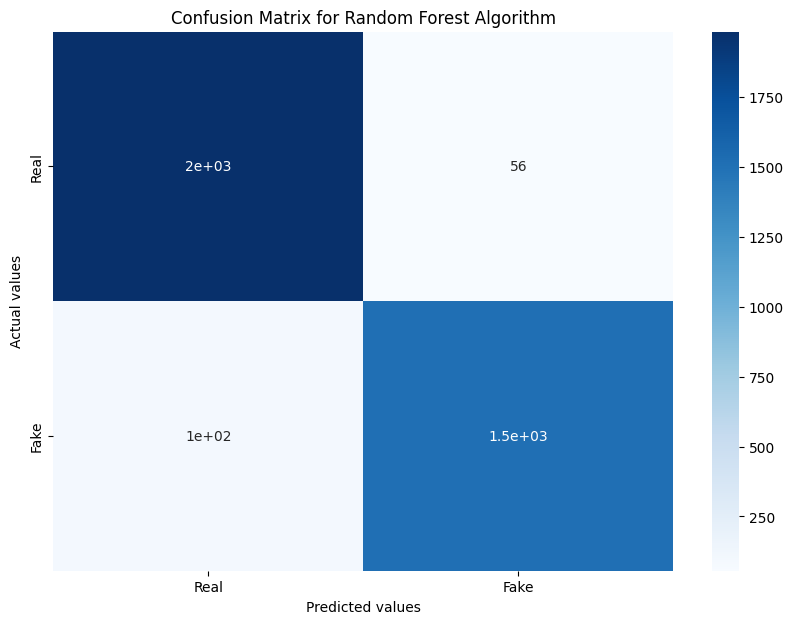

In [58]:

# Plotting the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(data=rf_cm, annot=True, cmap="Blues", xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Random Forest Algorithm')
plt.show()

In [59]:

# Hyperparameter tuning the Logistic Regression Classifier
best_accuracy = 0.0
c_val = 0.0
for i in [100,125,150,175,200,225,250,275,300]:
  temp_classifier = RandomForestClassifier(n_estimators=i,random_state=45).fit(X_train, y_train)
  temp_classifier.fit(X_train, y_train)
  temp_y_pred = temp_classifier.predict(X_test)
  score = accuracy_score(y_test, temp_y_pred)
  print("Accuracy score for C={} is: {}%".format(round(i,1), round(score*100,2)))
  if score>best_accuracy:
    best_accuracy = score
    c_val = i
print('--------------------------------------------')
print('The best accuracy is {}% with C value as {}'.format(round(best_accuracy*100, 2), round(c_val,1)))

Accuracy score for C=100 is: 95.19%
Accuracy score for C=125 is: 95.41%
Accuracy score for C=150 is: 95.41%
Accuracy score for C=175 is: 95.71%
Accuracy score for C=200 is: 95.62%
Accuracy score for C=225 is: 95.65%
Accuracy score for C=250 is: 95.73%
Accuracy score for C=275 is: 95.71%
Accuracy score for C=300 is: 95.79%
--------------------------------------------
The best accuracy is 95.79% with C value as 300


array([1])

In [63]:
classifier = RandomForestClassifier(n_estimators=300,random_state=45).fit(X_train, y_train)
classifier.fit(X_train, y_train)


RandomForestClassifier(n_estimators=300, random_state=45)

# Prediction

In [64]:

def fake_news(sample_news):

  df = pd.DataFrame({'final_text': [sample_news]})

  df['final_text'] = df['final_text'].apply(lambda x : re.sub(r'[^a-zA-Z\s]',' ',str(x)))
  df['final_text'] = df['final_text'].apply(lambda x : x.lower())

  df['final_text'] = df['final_text'].apply(remove_stopwords)
  df['final_text'] = df['final_text'].apply(lemmatize_text)
  #cv = CountVectorizer(max_features=5000, ngram_range=(1,3))


  temp = cv.transform(df['final_text']).toarray()
  print("Transformed")
  return classifier.predict(temp)


In [65]:

# Importing test dataset
df_test = pd.read_csv('kaggle_fake_test.csv')

In [66]:
df_test.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [67]:
news_title = df_test['title']+df_test['text']


In [68]:
from random import randint


In [71]:
# Predicting values
row = randint(0,news_title.shape[0]-1)
sample_news = news_title[row]

#print(sample_news.lower().split())

print('News: {}'.format(sample_news))
if fake_news(sample_news):
  print('Prediction: This is a FAKE news!')
else:
  print('Prediction: This is a REAL news.')


News: Trump Speaks With Taiwan’s Leader, an Affront to China - The New York TimesWASHINGTON  —     Donald J. Trump spoke by telephone with Taiwan’s president on Friday, a striking break with nearly four decades of diplomatic practice that could precipitate a major rift with China even before Mr. Trump takes office. Mr. Trump’s office said he had spoken with the Taiwanese president, Tsai   “who offered her congratulations. ” He is believed to be the first president or   who has spoken to a Taiwanese leader since at least 1979, when the United States severed diplomatic ties with Taiwan as part of its recognition of the People’s Republic of China. In the statement, Mr. Trump’s office said the two leaders had noted “the close economic, political, and security ties” between Taiwan and the United States. Mr. Trump, it said, “also congratulated President Tsai on becoming President of Taiwan earlier this year. ” Mr. Trump’s motives in taking the call, which lasted more than 10 minutes, were no